In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, betabinom, norm

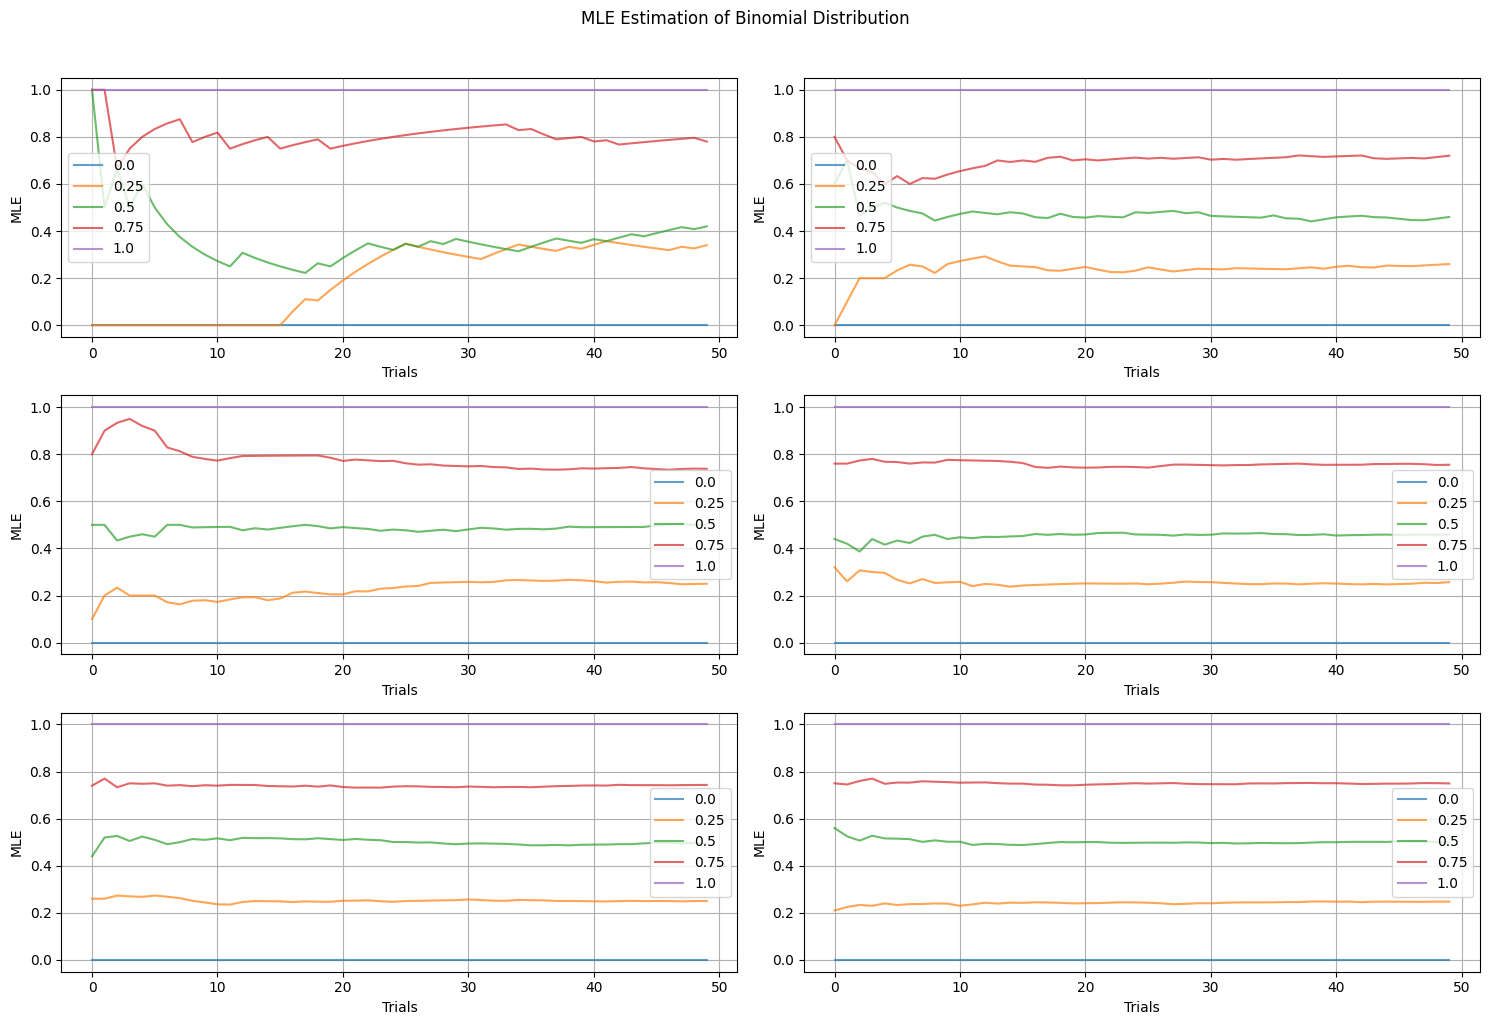

In [36]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
trials_list = [1, 5, 10, 25, 50, 100]
samples = 50

def generate_binomial_data(p, trials, samples):
  data = np.random.binomial(trials, probabilities, (samples, probabilities.size))
  mle = np.cumsum(data, axis=0) / np.cumsum(np.ones_like(data) * trials, axis=0)
  return mle


fig, axes = plt.subplots(int(np.ceil(len(trials_list) / 2)), 2, figsize=(15, 10))
axes = axes.flatten()
for i, ax in enumerate(axes):
  if i > len(trials_list) - 1:
    break

  mle_by_sample = generate_binomial_data(probabilities, trials_list[i], samples)
  ax.plot(mle_by_sample, label=probabilities, alpha=0.7)
  ax.set_xlabel('Trials')
  ax.set_ylabel('MLE')
  ax.legend()
  ax.grid(True)

fig.suptitle('MLE Estimation of Binomial Distribution', y=1.02)
plt.tight_layout()
plt.show()

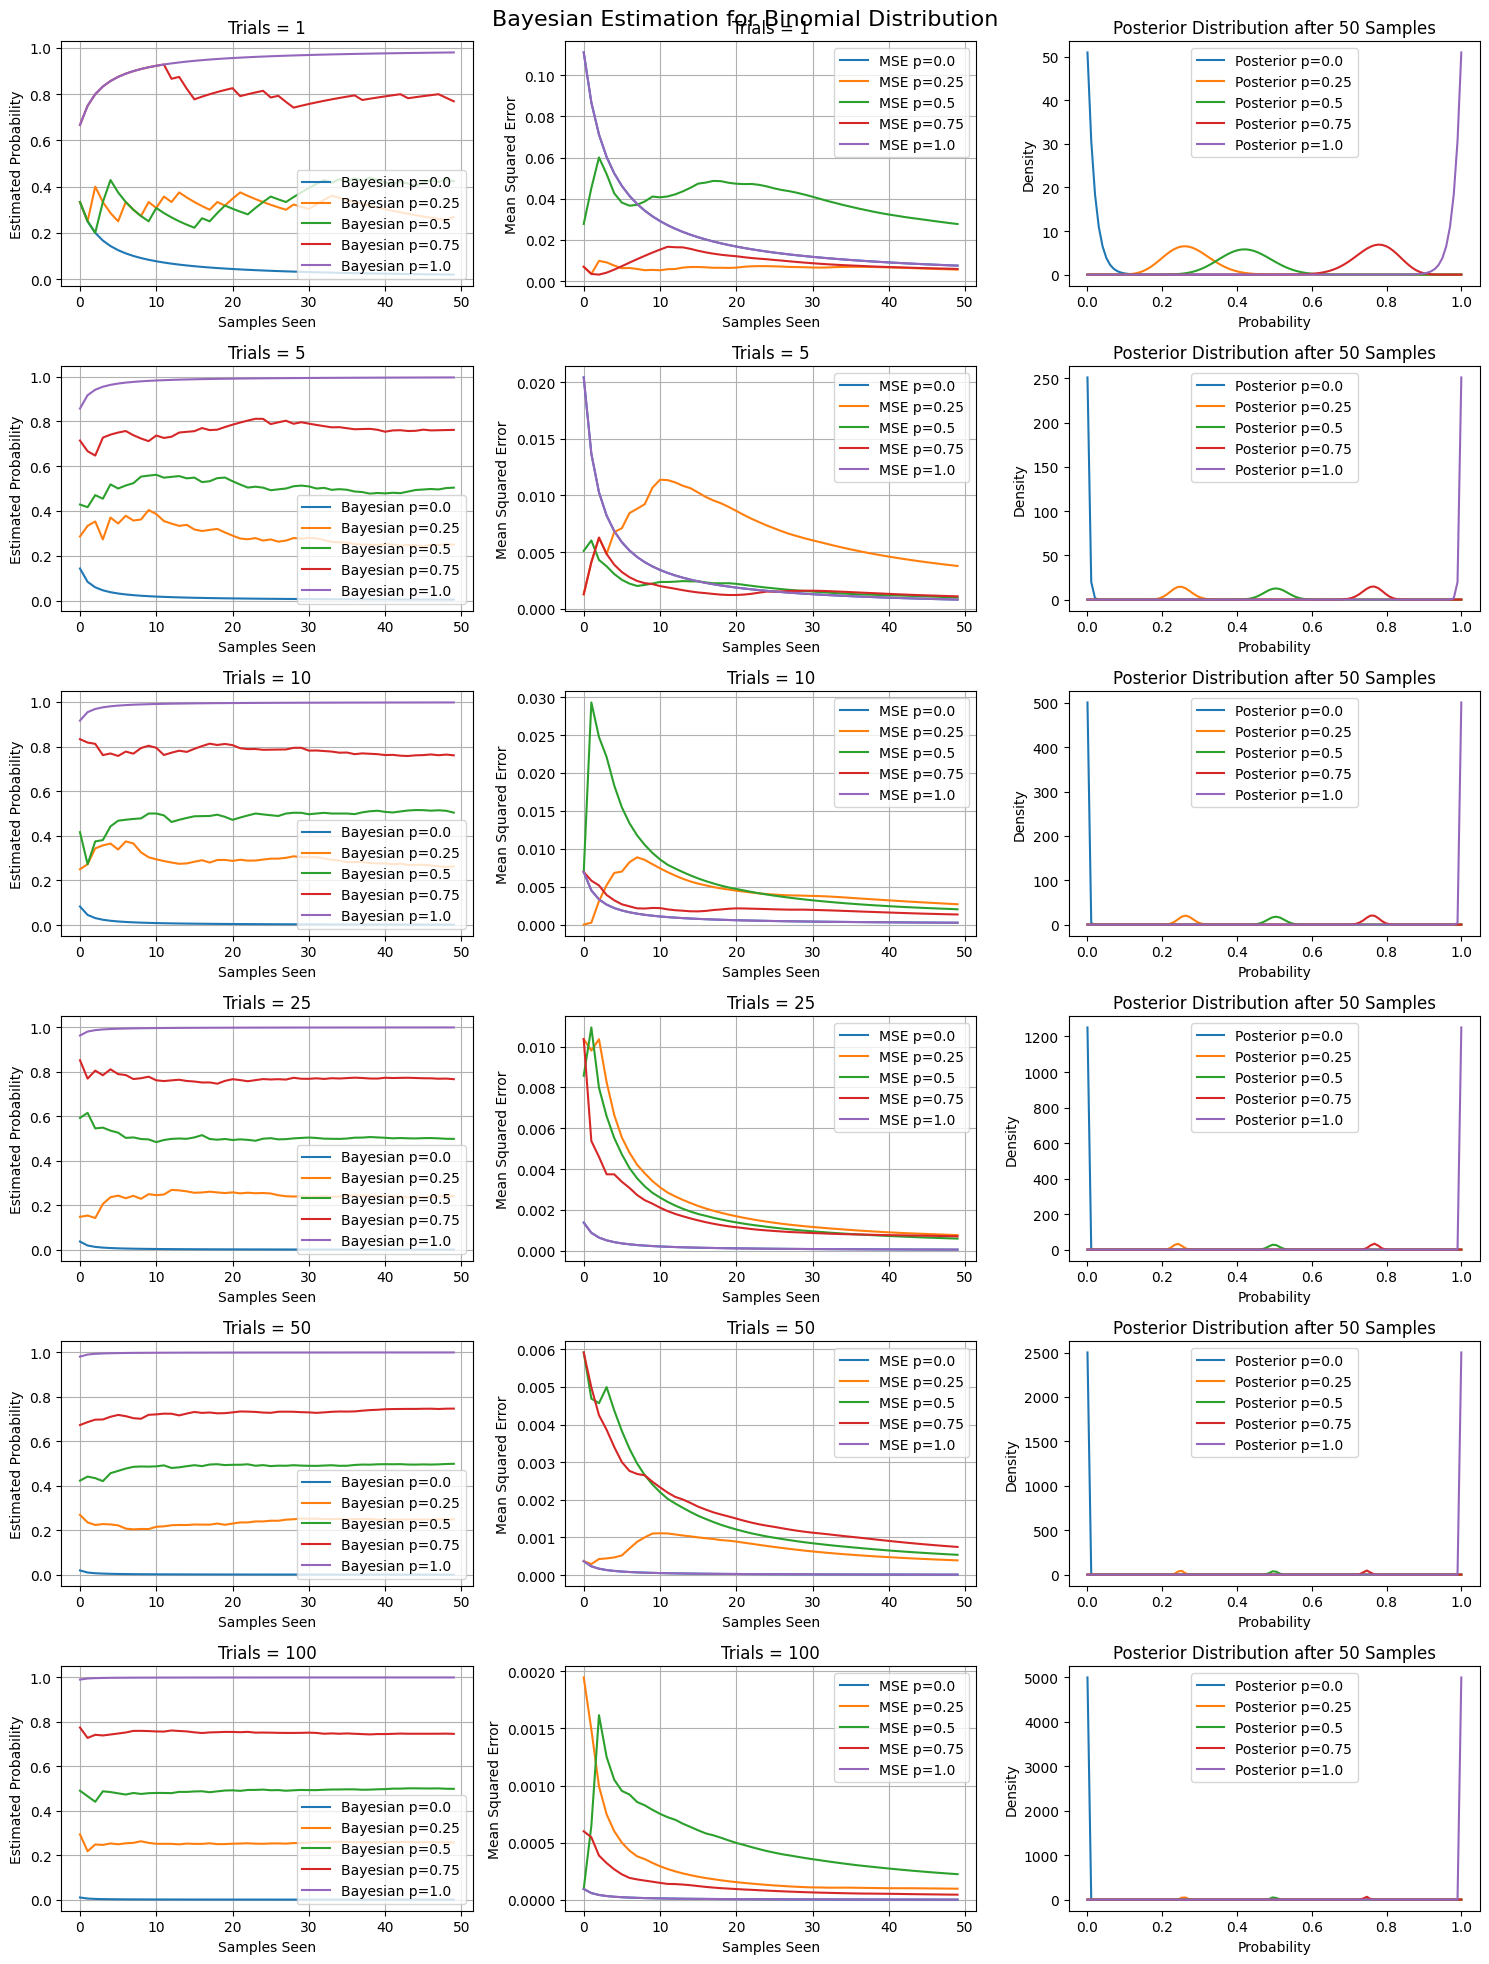

In [37]:
probabilities = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
trials_list = [1, 5, 10, 25, 50, 100]
samples = 50

prior_a = 1
prior_b = 1

def generate_binomial_bayesian_data(p, trials, samples, prior_a, prior_b):
  data = np.random.binomial(trials, probabilities, (samples, probabilities.size))
  posterior_a = prior_a + np.cumsum(data, axis=0)
  posterior_b = prior_b + np.cumsum(trials - data, axis=0)
  posterior_p = posterior_a / (posterior_a + posterior_b)
  mse = np.cumsum(np.square(posterior_p - probabilities), axis=0) / np.cumsum(np.ones_like(posterior_p), axis=0)
  return posterior_p, mse, (posterior_a[-1, :], posterior_b[-1, :])

fig, axes = plt.subplots(len(trials_list), 3, figsize=(15, 20))

for i, ax_row in enumerate(axes):
  ax1 = ax_row[0]
  ax2 = ax_row[1]
  ax3 = ax_row[2]

  posterior_p_by_sample, mse_by_sample, (posterior_a, posterior_b) = generate_binomial_bayesian_data(probabilities, trials_list[i], samples, prior_a, prior_b)

  ax1.plot(posterior_p_by_sample, label=[f'Bayesian p={p}'for p in probabilities])
  ax1.set_xlabel('Samples Seen')
  ax1.set_ylabel('Estimated Probability')
  ax1.set_title(f'Trials = {trials_list[i]}')
  ax1.legend(loc='lower right')
  ax1.grid(True)

  ax2.plot(mse_by_sample, label=[f'MSE p={p}'for p in probabilities])
  ax2.set_xlabel('Samples Seen')
  ax2.set_ylabel('Mean Squared Error')
  ax2.set_title(f'Trials = {trials_list[i]}')
  ax2.legend(loc='upper right')
  ax2.grid(True)

  from scipy.stats import beta
  x = np.linspace(0, 1, 100)
  for j in range(len(probabilities)):
    ax3.plot(x, beta.pdf(x, posterior_a[j], posterior_b[j]), label=f'Posterior p={probabilities[j]}')
  ax3.set_xlabel('Probability')
  ax3.set_ylabel('Density')
  ax3.set_title(f'Posterior Distribution after {samples} Samples')
  ax3.legend()


fig.suptitle('Bayesian Estimation for Binomial Distribution', fontsize=16)
fig.tight_layout()
plt.show()

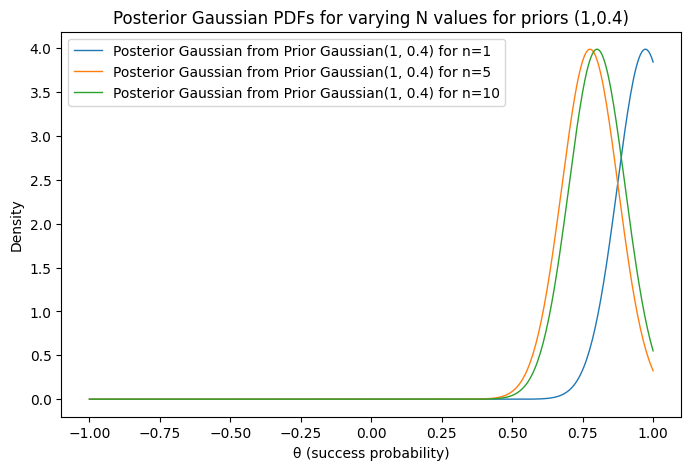

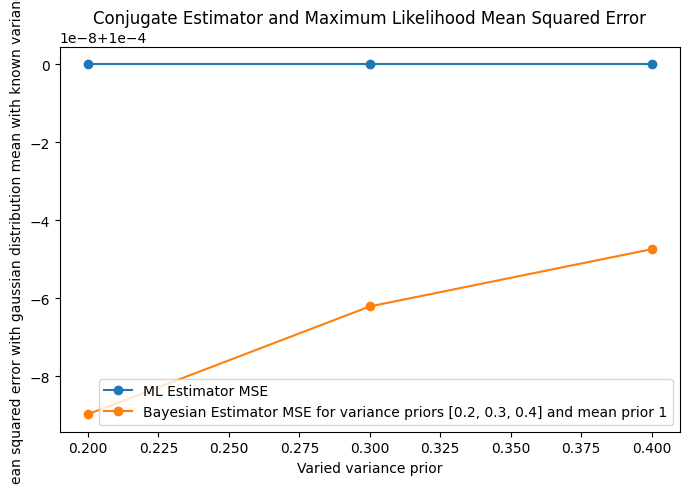

In [38]:
variance_priors = [0.2,0.3,0.4]

mean_prior = 1
true_mean = 0.8
true_var = 0.1
n_values = [1,5, 10]

ml_mses = []
bayes_mses = []
n = 1000
normal_samples = np.random.normal(true_mean, true_var, n)
for variance_prior in variance_priors:
    
    ml_estimator = normal_samples.mean()
    bayes_estimator = mean_prior * (true_var/(n*variance_prior + true_var)) + ml_estimator * (n*variance_prior/(n*variance_prior + true_var))
    ml_mse = true_var / n
    ml_mses.append(ml_mse)
    bayes_mse = (true_var /(true_var + n * variance_prior)) **2 * (mean_prior - bayes_estimator)**2 + ml_mse * (n*variance_prior /(true_var + n * variance_prior))**2
    bayes_mses.append(bayes_mse)
    theta = np.linspace(0, 1, n)
    if variance_prior == 0.4:
        loop_pdfs = []
        plt.figure(figsize=(8, 5))
        for loopN in n_values:
            normal_samples = np.random.normal(true_mean, true_var, loopN)
            ml_estimator = normal_samples.mean()
            loop_bayes_estimator = mean_prior * (true_var/(loopN*variance_prior + true_var)) + ml_estimator * (loopN*variance_prior/(loopN*variance_prior + true_var))
            theta = np.linspace(-1, 1, 400)
            plt.plot(theta, norm.pdf(theta, loop_bayes_estimator, true_var), label=f"Posterior Gaussian from Prior Gaussian({mean_prior}, {variance_prior}) for n={loopN}", linewidth=1)
        plt.title(f"Posterior Gaussian PDFs for varying N values for priors ({mean_prior},{variance_prior})")
        plt.xlabel("θ (success probability)")
        plt.ylabel("Density")
        plt.legend()
        plt.show()
plt.figure(figsize=(8, 5))
plt.plot(variance_priors, ml_mses, label=f"ML Estimator MSE", marker='o')
plt.plot(variance_priors, bayes_mses, label=f"Bayesian Estimator MSE for variance priors {variance_priors} and mean prior 1", marker='o')
plt.title("Conjugate Estimator and Maximum Likelihood Mean Squared Error")
plt.xlabel("Varied variance prior")
plt.ylabel("Mean squared error with gaussian distribution mean with known variance")
plt.legend()
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm
import os

mu = 0.5
sigma = 6 
num_samples = 200

normal_samples = np.random.normal(mu, sigma, num_samples)

prior_shape = 2
prior_rate = 2

shape_updates = prior_shape + (np.arange(num_samples) + 1)/2
rate_updates = prior_rate + 0.5 * np.cumsum(np.square(normal_samples - mu))

mle_estimator = np.cumsum(np.square(normal_samples - mu))

if not os.path.exists('gamma_frames'):
    os.makedirs('gamma_frames')

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

x_normal = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
normal_likelihood_pdf = norm.pdf(x_normal, mu, sigma)


x_gamma = np.linspace(1e-9, 0.1, 500) 


for i in range(num_samples):
    
    axes[0].clear() 
    axes[0].plot(x_normal, normal_likelihood_pdf, label=f'True Normal Likelihood (mu={mu}, sigma={sigma:.2f})', color='gray', linestyle='--')

    current_shape = shape_updates[i]
    current_rate = rate_updates[i]
    if current_shape > 1:
        precision_mode = (current_shape - 1) / current_rate
        estimated_std = 1 / np.sqrt(precision_mode)

        estimated_normal_pdf = norm.pdf(x_normal, mu, estimated_std)
        axes[0].plot(x_normal, estimated_normal_pdf, label=f'Estimated Normal (Sample {i+1}, std={estimated_std:.2f})')

    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    axes[0].set_title('Normal Likelihood and Estimated Normal Distribution')
    axes[0].grid(True)
    axes[0].legend()


    axes[1].clear()
    y_posterior_gamma = gamma.pdf(x_gamma, a=current_shape, scale=1/current_rate)
    axes[1].plot(x_gamma, y_posterior_gamma, label=f'Posterior Precision (Sample {i+1})')

    axes[1].set_xlabel('Precision (1/variance)')
    axes[1].set_ylabel('Density')
    axes[1].set_title(f'Gamma Posterior for Precision (Sample {i+1})')
    axes[1].grid(True)
    axes[1].legend()
    axes[1].set_ylim(0, np.max(y_posterior_gamma) * 1.1)

    plt.tight_layout()

    plt.savefig(f'gamma_frames/gamma_frame_{i}.png') 

plt.close(fig)

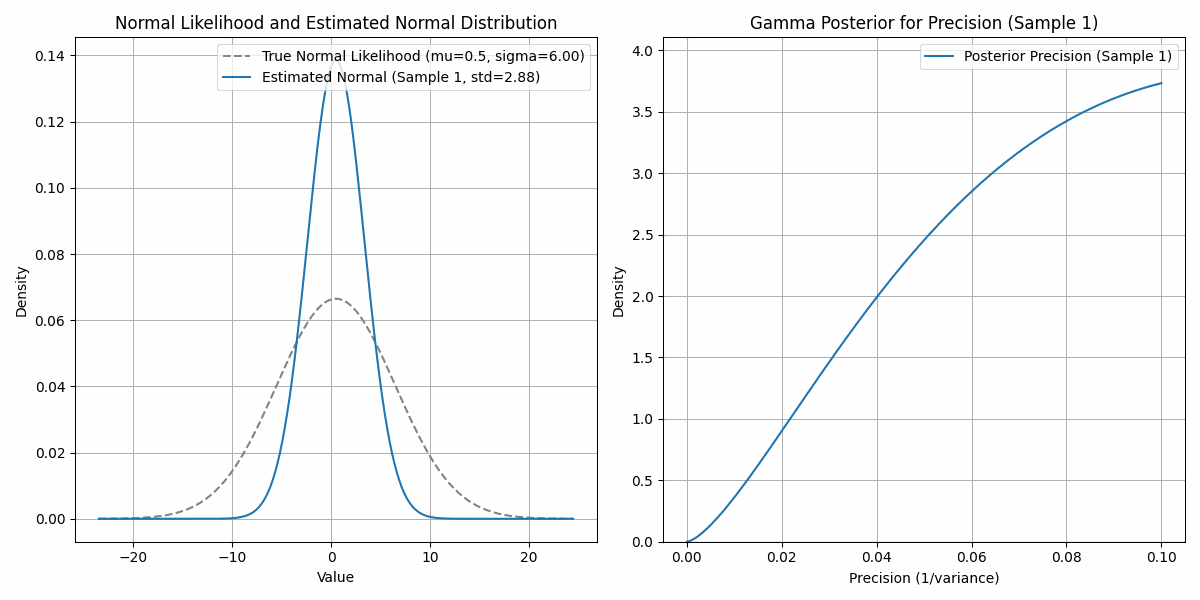

In [40]:
import imageio
import os

filenames = [f'./gamma_frames/gamma_frame_{i}.png' for i in range(len(rate_updates))]

with imageio.get_writer('gamma_animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

from IPython.display import Image
Image(open('./gamma_animation.gif','rb').read())